# Assignment 8

*(Due Saturday, November 16, 2019 at noon.)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

Load your dataset and create at least one visualization involving at least two variables (columns). Explain the relevance of this graph in the Markdown cell below, and use comments to document the code you use to produce it.

In [2]:
df = pd.read_csv('../dataset/ds.csv')

In [3]:
df.dropna().drop(df.columns[0],axis='columns')

,questionnaireStatus,subjectGender,subjectBirthYear,subjectMirahId,appointmentDate,begunDate,completionDate,performerRelation,attachment.raw,avoidance.raw,...,breathRacingOrNumbness,concernedDrugDependent,othersConcernedDrugUse,drugUseInterferes,needToReduceDrugUse,betterOffDead,thoughtsOfSuicide,fearLoseControlSuicide,plansForHowSuicide,subjectAge
18,complete,M,1969,006673b8-0446-462a-baef-1b233ae3e411,2017-07-06 15:00:00 UTC,2017-07-06 18:00:34 UTC,2017-07-06 18:11:30 UTC,patient,5.250000,3.000000,...,1.0,1.0,1.0,1.0,1.0,3.0,6.0,4.0,2.0,48
42,complete,M,1989,008318f9-df4c-4535-99a9-297777cf8dc6,2017-11-16 19:15:00 UTC,2017-11-16 20:54:36 UTC,2017-11-16 21:13:12 UTC,patient,2.750000,3.600000,...,1.0,7.0,7.0,7.0,7.0,1.0,1.0,5.0,1.0,28
44,complete,M,1989,008318f9-df4c-4535-99a9-297777cf8dc6,2018-03-09 01:15:00 UTC,2018-03-09 00:53:56 UTC,2018-03-09 01:08:20 UTC,patient,5.750000,5.000000,...,1.0,7.0,7.0,7.0,7.0,1.0,1.0,1.0,1.0,28
99,complete,M,1989,036f7d8f-53f3-4045-a165-6f7c5d76e50f,2017-07-19 13:00:00 UTC,2017-07-19 15:49:29 UTC,2017-07-19 15:59:57 UTC,patient,7.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28
151,complete,F,1996,083453bf-5ea8-4ed5-8b15-d3868461f6ea,2017-06-06 17:15:00 UTC,2017-06-06 20:01:40 UTC,2017-06-06 20:16:33 UTC,patient,5.750000,6.800000,...,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,21
181,complete,M,1987,0844ed67-693c-4be6-a5e6-a0a5f3001c66,2018-03-05 22:30:00 UTC,2018-03-05 20:50:57 UTC,2018-03-05 21:08:42 UTC,patient,4.000000,5.800000,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,30
196,complete,F,1987,089eeea7-4844-4263-812f-e1b452b3be4e,2017-11-17 23:16:09 UTC,2017-11-17 23:16:10 UTC,2017-11-17 23:25:29 UTC,patient,5.500000,4.600000,...,2.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,30
203,complete,M,1983,08daaff5-142b-4c67-a7ea-e14b3bdd2fef,2017-09-11 16:15:00 UTC,2017-09-11 16:56:55 UTC,2017-09-11 17:12:59 UTC,patient,4.750000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34
205,complete,F,1996,091b5366-539c-4235-80d8-04910a7387dc,2017-06-05 18:30:00 UTC,2017-06-05 02:54:55 UTC,2017-06-05 03:04:30 UTC,patient,3.500000,2.600000,...,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,1.0,21
208,complete,F,1996,091b5366-539c-4235-80d8-04910a7387dc,2017-09-18 21:00:00 UTC,2017-09-18 20:28:51 UTC,2017-09-18 20:38:56 UTC,patient,3.250000,3.600000,...,4.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,1.0,21


#### First, I created a histogram graph to explore the distribution of the participants' age in my sample.

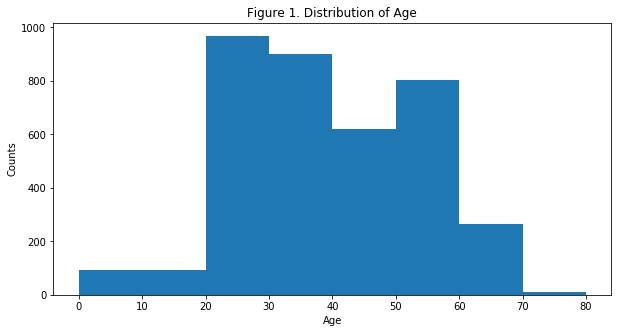

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
rect1 = ax.hist('subjectAge', data=df.dropna(subset=['subjectAge']), bins=(0, 20, 30, 40, 50, 60, 70, 80))
plt.title('Figure 1. Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

As Figure 1. shows, we have the most participants in Age 20-30 group and the least participants in Age 70-80 group.

#### Suicide Risk is my response(dependent) variable, which will be calculated based on 4 likert-scale questions. To look at the gender differences of the suicide risk, I used bar chart to compare the mean scores for these 4 questions between male and female.

In [5]:
SR = ['betterOffDead','thoughtsOfSuicide','fearLoseControlSuicide','plansForHowSuicide']
x_SR = np.arange(4)
SR_gender = df.groupby('subjectGender').mean()[SR]

In [6]:
SR_gender

,betterOffDead,thoughtsOfSuicide,fearLoseControlSuicide,plansForHowSuicide
subjectGender,,,,
F,1.874561,1.654362,1.501656,1.314381
M,1.860056,1.807910,1.610805,1.377380


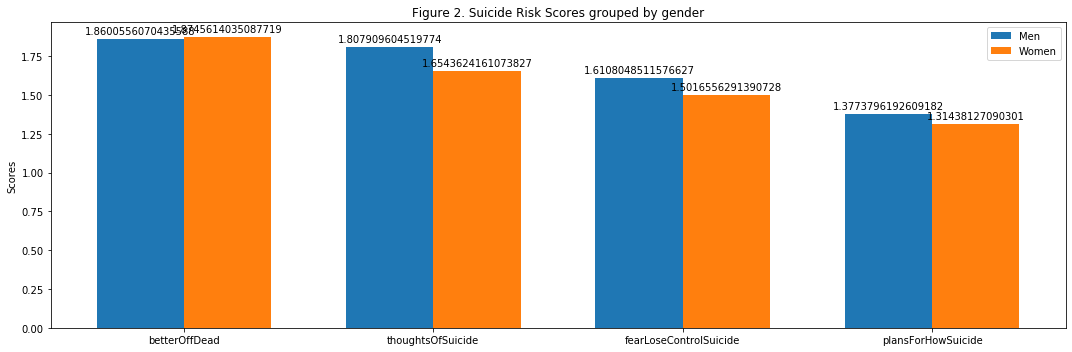

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
width = 0.35
rects1 = ax.bar(x_SR - width/2, SR_gender.loc['M',:], width, label='Men')
rects2 = ax.bar(x_SR + width/2, SR_gender.loc['F',:], width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Figure 2. Suicide Risk Scores grouped by gender')
ax.set_xticks(x_SR)
ax.set_xticklabels(SR)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Figure 2. shows the differences between male and female for the 4 suicide risk questions are very small. Gender may not be a predictor for suicide risk.

#### Substance Use is a significant predictor for suicide risk. I want to look at the relationship between gender and substance use to see if I need to added the interaction form of two variables in my prediction model. I also used bar chart to show the gender differences for mean scores of the 4 substance use related questions.

In [8]:
SU = ['concernedDrugDependent','othersConcernedDrugUse','drugUseInterferes','needToReduceDrugUse']
x_SU = np.arange(4)
SU_gender = df.groupby('subjectGender').mean()[SU]

In [9]:
SU_gender

,concernedDrugDependent,othersConcernedDrugUse,drugUseInterferes,needToReduceDrugUse
subjectGender,,,,
F,1.523875,1.956204,2.023460,2.416216
M,1.978661,3.175520,2.727477,3.202505


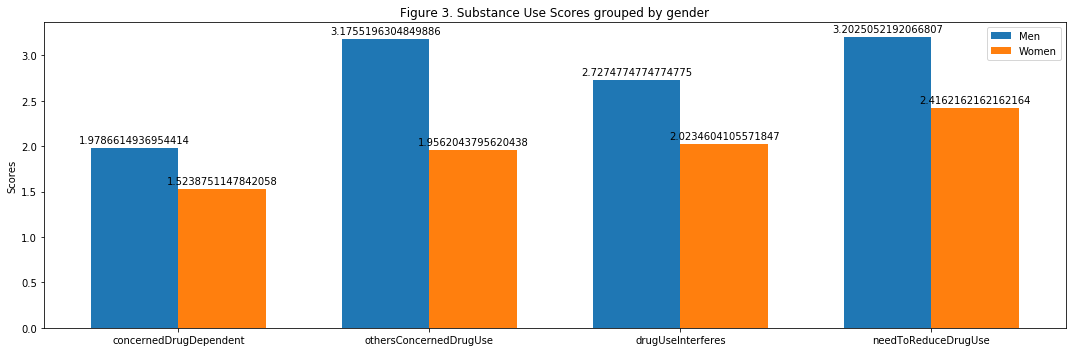

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
width = 0.35
rects1 = ax.bar(x_SU - width/2, SU_gender.loc['M',:], width, label='Men')
rects2 = ax.bar(x_SU + width/2, SU_gender.loc['F',:], width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Figure 3. Substance Use Scores grouped by gender')
ax.set_xticks(x_SU)
ax.set_xticklabels(SU)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Apparently, as shown in Figure 3, the gender differences for substance use related questions are larger than the suicide risk related questions, ranging from 0.45 to 1.22. Further statistical test need to be conducted to confirm the group differences.